In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np

keep_le = []

# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    # transform_d(G)  
    return G



In [2]:
#group Area chanel
All_Group = []
for dept in range(1,11):

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(1)))

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(2)))




In [3]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

In [4]:

# keep_en = []
# keep_en.append(LabelEncoder())
le = LabelEncoder()
def transform_now(data):
    data[:,0]=le.fit_transform(data[:,0])

def inverse_d_new(data):
     xx = []
     for i in range(data.shape[0]):
          xx.append(data[i,0])
     # print(xx)
     data[:,0]=le.inverse_transform(xx)

In [5]:
    
def fill_value_miss(miss_data):
#     print(miss_data)
    df = pd.DataFrame(miss_data)
#     print(df.isnull().sum())
#     for i in df.iterrows():
#      pass
    df.fillna(method='backfill',inplace=True)
    df = df.to_numpy()
    transform_now(df)
    return df




def find_value_miss(G):
     "DayKey","ProductGroup","Area","Channel"
     print("ProductGroup : {}, Area : {} ,Channel : {}".format(G[0,1],G[0,2],G[0,3]))
     print("start : {}, end : {} ".format(G[0, 0],G[-1, 0]))
     date_full = gendate(G[-1, 0], G[0, 0])
     miss_data = [[0]*2 for i in range(date_full.shape[0])]
     miss_data = np.array(miss_data,dtype=object)
     count_miss_day = 0
     origin_index = 0
     for i in range(date_full.shape[0]):  
          if G[origin_index,0] == date_full[i]:   #G[G == date_full[i]]:
               miss_data [i][0] = G[origin_index,0]
               miss_data [i][1] = G[origin_index,5]
               origin_index  +=1
          else :
               miss_data [i][0] = date_full[i]
               miss_data [i][1] = None
               count_miss_day += 1
     # print(miss_data)
     miss_data = fill_value_miss(miss_data)
     print('missing CumSales of invidual day =',count_miss_day)
     return miss_data

In [6]:
def find_group(product,area,chanel):
    stop_g = (12*product)-1
    dept_g = stop_g - 11
    row_1 = np.arange(0,6)
    row_2 = np.arange(6,12)
    if chanel == 1:
        dept_g += row_1[area-1]   
    else :
        dept_g += row_2[area-1]
    return dept_g 



In [7]:
# imort model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [8]:
# select G and preparations
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
plot_st_day = []
plot_stop_day = []
plot_true_day =[]
plot_true_sale =[]
plot_pred = []
MAE_VALUE = []
MSE_VALUE = []
R_score =[]


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269


หาปีที่ต้องการสำหรับการจำแนกข้อมูล

In [9]:
def find_year(info,year):
    inverse_d_new(info)
    info[:,0]
    index_start = 0
    keep_index = []
    for i in range(info.shape[0]):
        origin_year = info[i,0]
        if origin_year[:4]==year:
            index_start = i
            break
    transform_now(info)
    for i in range(12):
        keep_index.append(index_start)
        if i==2 or i==7 or i==10:
            index_start +=366
        else :
            index_start +=365
    return keep_index

# transform_now(info)
# index_start=find_year(info,'2010')
print(info)
# inverse_d_new(info)
# index_start

[[0 330092.0]
 [1 330092.0]
 [2 539162.0]
 ...
 [4531 9602814.0]
 [4532 10034883.0]
 [4533 10444339.0]]


In [10]:
##### month 1 ##### LinearRegression

# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30


x_train = info[:3,0]#10 วัน
y_train = info[:3,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[30,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
# info[30,1]


MAE_VALUE.append(mean_absolute_error([info[30,1]],pred))
MSE_VALUE.append(mean_squared_error([info[30,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)


Predict_value =  [3431297.]
R2_core = 75.000


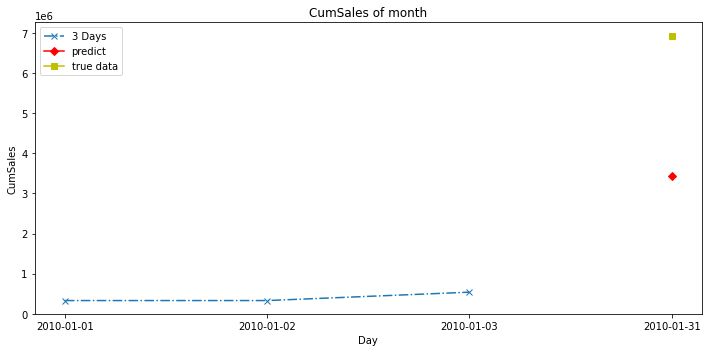

In [11]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [12]:
##### month 2 ##### linearRegression

# print(info[31:41])
# print(All_Group[A][30:56]) # 30 to 56


x_train = info[31:34,0]#10 วัน
y_train = info[31:34,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[58,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[58,1]


MAE_VALUE.append(mean_absolute_error([info[58,1]],pred))
MSE_VALUE.append(mean_squared_error([info[58,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7464800.33333333]
R2_core = 99.456


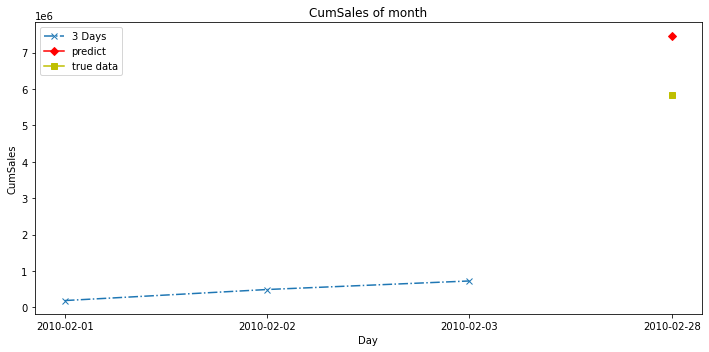

In [13]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [14]:
##### month 3 ##### linearRegression

# print(info[59:90])
# print(All_Group[A][30:56]) # 30 to 56

x_train = info[59:62,0]#10 วัน
y_train = info[59:62,1]
dtree =  LinearRegression   ()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[89,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[89,1]
# print(info[89])
# print(info[59:69])


MAE_VALUE.append(mean_absolute_error([info[89,1]],pred))
MSE_VALUE.append(mean_squared_error([info[89,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [4413120.5]
R2_core = 75.000


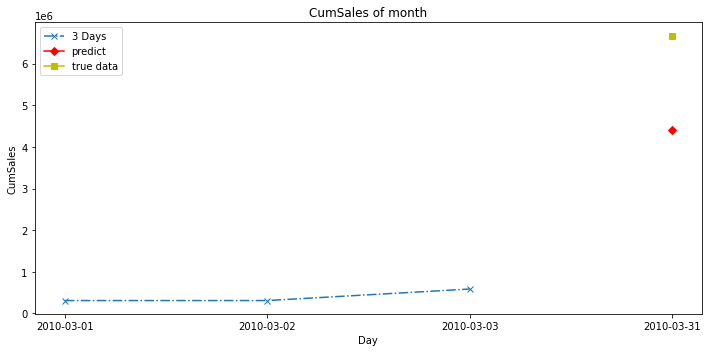

In [15]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [16]:
##### month 4 ##### linearRegression

# print(info[90:120])
# print(All_Group[A][30:56]) # 30 to 56


x_train = info[90:93,0]#10 วัน
y_train = info[90:93,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[119,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[119,1]
# print(info[90:100])


MAE_VALUE.append(mean_absolute_error([info[119,1]],pred))
MSE_VALUE.append(mean_squared_error([info[119,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7463934.]
R2_core = 92.571


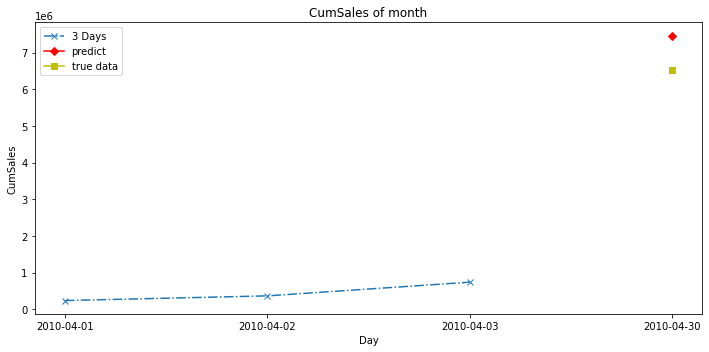

In [17]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [18]:
##### month 5 ##### linearRegression

# print(info[121:151])
# print(All_Group[A][114:142]) 


x_train = info[121:124,0]#10 วัน
y_train = info[121:124,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[150,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[150,1]
# print(info[121:131,0])


MAE_VALUE.append(mean_absolute_error([info[150,1]],pred))
MSE_VALUE.append(mean_squared_error([info[150,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7807536.]
R2_core = 99.940


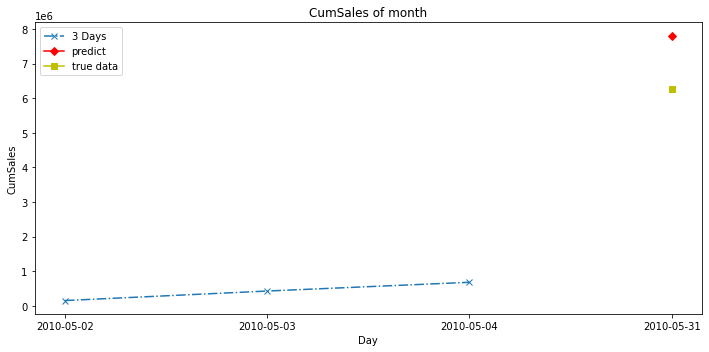

In [19]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [20]:
##### month 6 ##### linearRegression

# print(info[151:181])
# print(All_Group[A][114:142]) 


x_train = info[151:154,0]#10 วัน
y_train = info[151:154,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[180,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[180,1]
# print(info[180,0])


MAE_VALUE.append(mean_absolute_error([info[180,1]],pred))
MSE_VALUE.append(mean_squared_error([info[180,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7023343.33333333]
R2_core = 98.985


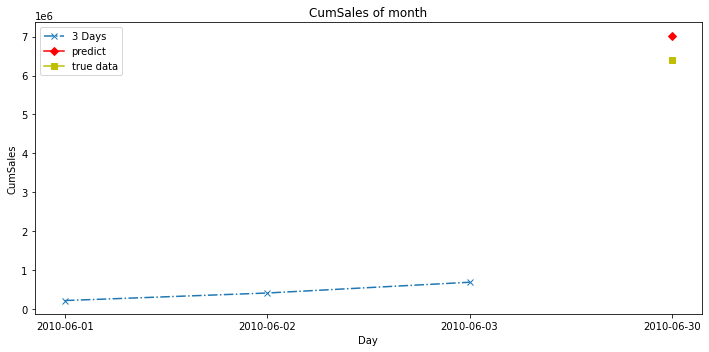

In [21]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [22]:
##### month 7 ##### linearRegression

# print(info[181:212])
# print(All_Group[A][114:142]) 


x_train = info[181:184,0]#10 วัน
y_train = info[181:184,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[211,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[211,1]
# print(info[211])


MAE_VALUE.append(mean_absolute_error([info[211,1]],pred))
MSE_VALUE.append(mean_squared_error([info[211,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [6576621.83333334]
R2_core = 96.271


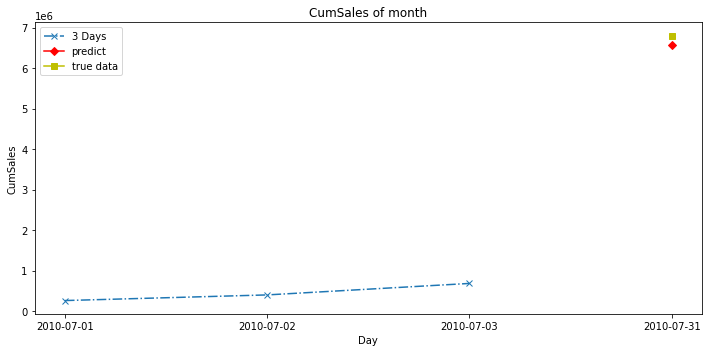

In [23]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [24]:
##### month 8 ##### linearRegression

# print(info[212:243])
# print(All_Group[A][114:142]) 


x_train = info[212:215,0]#10 วัน
y_train = info[212:215,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[242,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[242,1]
# print(info[242])


MAE_VALUE.append(mean_absolute_error([info[242,1]],pred))
MSE_VALUE.append(mean_squared_error([info[242,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [8230861.66666666]
R2_core = 99.733


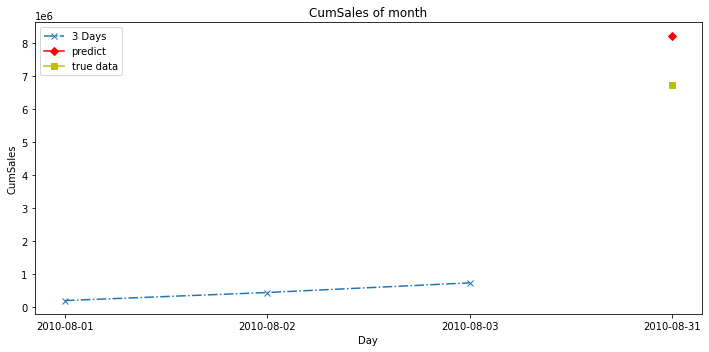

In [25]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [26]:
##### month 9 ##### linearRegression

# print(info[243:273])
# print(All_Group[A][114:142]) 


x_train = info[243:246,0]#10 วัน
y_train = info[243:246,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[272,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[272,1]
# print(info[242])


MAE_VALUE.append(mean_absolute_error([info[272,1]],pred))
MSE_VALUE.append(mean_squared_error([info[272,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)


Predict_value =  [6142807.66666666]
R2_core = 96.639


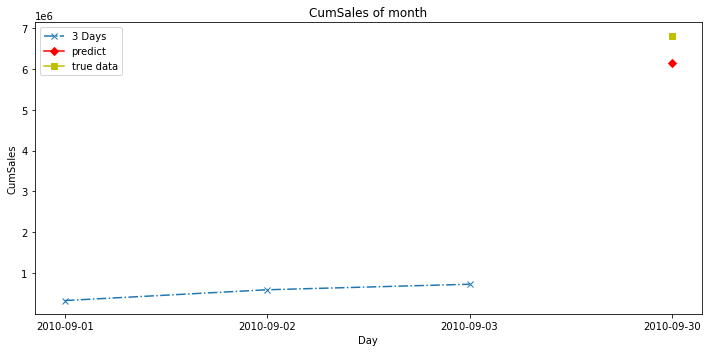

In [27]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [28]:
##### month 10 ##### linearRegression

# print(info[273:304])
# print(All_Group[A][114:142]) 


x_train = info[273:276,0]#10 วัน
y_train = info[273:276,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[303,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[303,1]
# print(info[242])


MAE_VALUE.append(mean_absolute_error([info[303,1]],pred))
MSE_VALUE.append(mean_squared_error([info[303,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)


Predict_value =  [6421978.83333333]
R2_core = 96.496


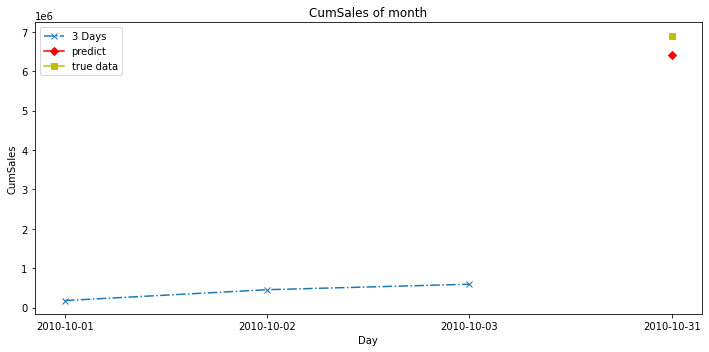

In [29]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [30]:
##### month 11 ##### linearRegression

# print(info[303:334])
# print(All_Group[A][114:142]) 

x_train = info[304:307,0]#10 วัน
y_train = info[304:307,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[333,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[333,1]
# print(info[333])


MAE_VALUE.append(mean_absolute_error([info[333,1]],pred))
MSE_VALUE.append(mean_squared_error([info[333,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7086230.]
R2_core = 99.300


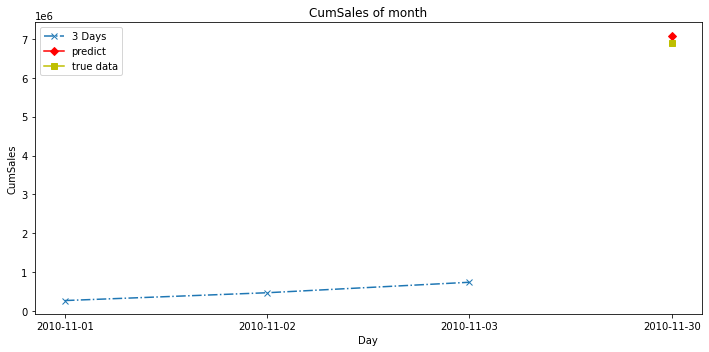

In [31]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [32]:
##### month 12 ##### linearRegression
# print(info[334:365])
# print(All_Group[A][114:142]) 

x_train = info[334:337,0]#10 วัน
y_train = info[334:337,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[363,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
info[364,1]

MAE_VALUE.append(mean_absolute_error([info[363,1]],pred))
MSE_VALUE.append(mean_squared_error([info[363,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)


Predict_value =  [7826829.]
R2_core = 100.000


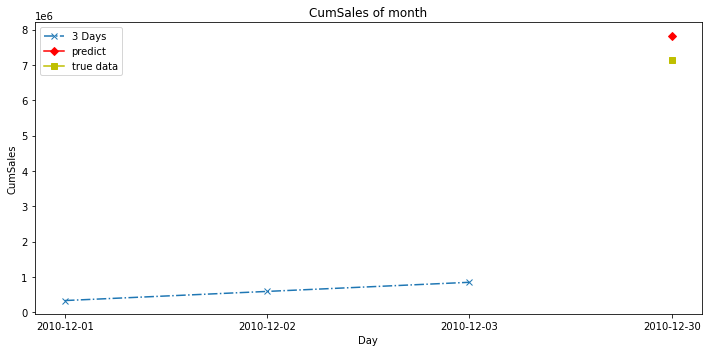

In [33]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [34]:
# inverse_d_new(info)
# transform_now(info)


In [35]:

MAE_avg = np.average(MAE_VALUE)
MSE_avg = np.average(MSE_VALUE)
R2_score = np.average(R_score)


print("mean_absolute_error = ",MAE_avg)
print("mean_squared_error = ",MSE_avg)
print("R2_score %.3f" % (R2_score*100),"%")

mean_absolute_error =  1190031.8749999986
mean_squared_error =  2268935007392.1143
R2_score 94.116 %


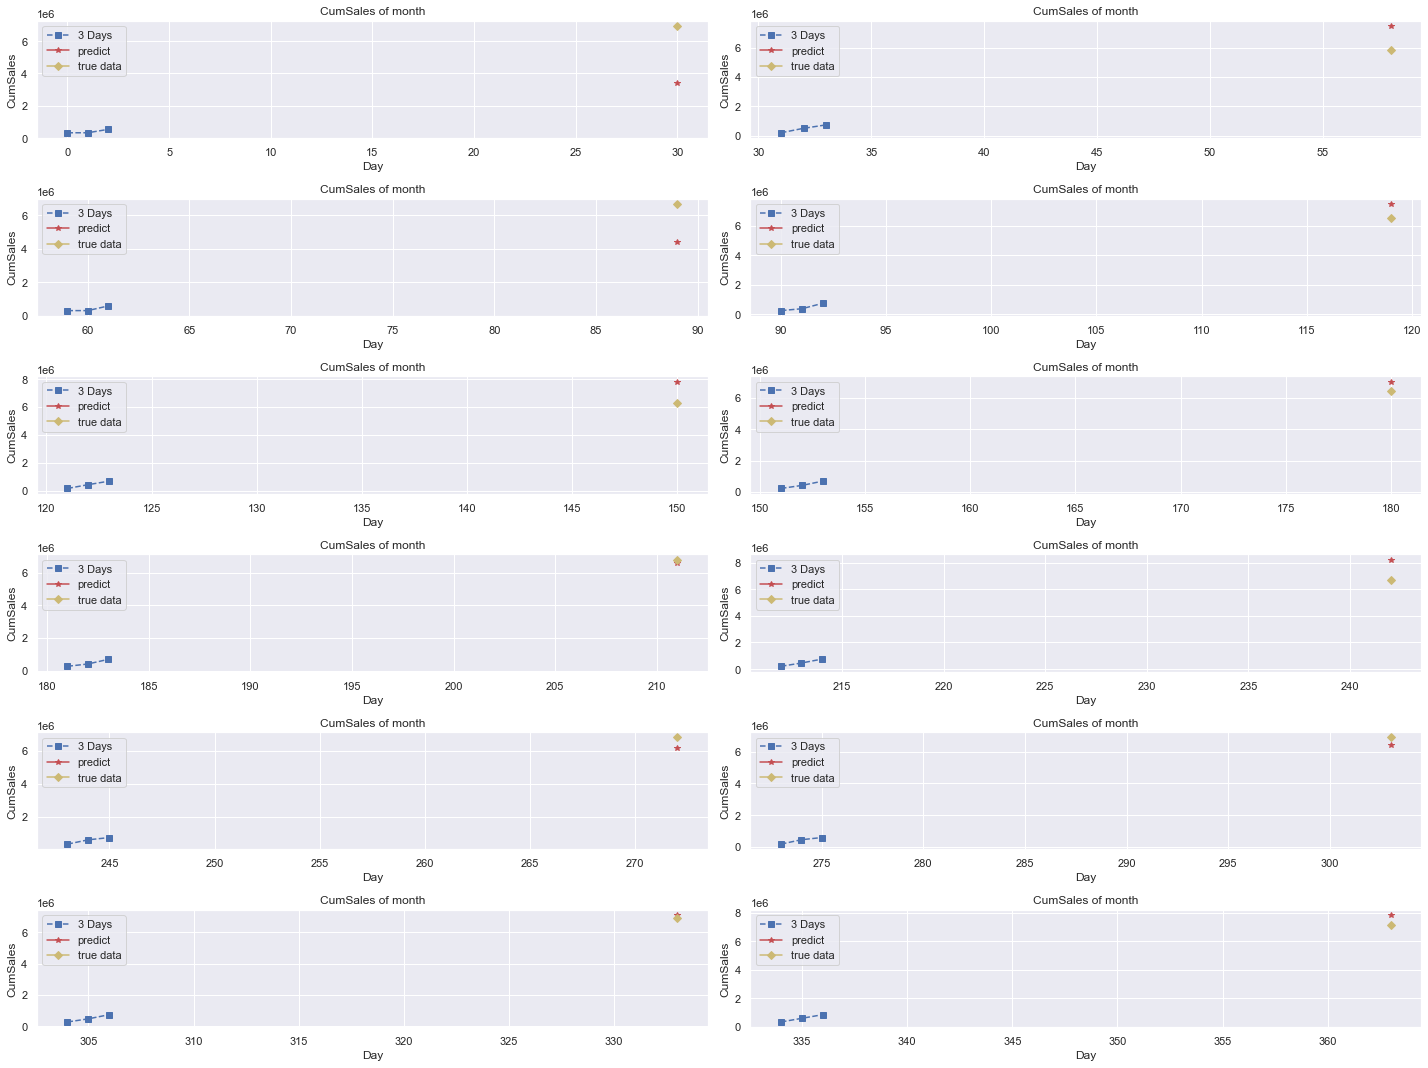

In [36]:
# inverse_d_new(info)
# seaborn
sn.set_theme(style='darkgrid')
fig,axs = plt.subplots(nrows=6, ncols=2,figsize=(20,15))
index_for_plot = 0
for i in range(6):
    for j in range(2):
        index = plot_true_day[index_for_plot]
        axs[i,j].set_title('CumSales of month')
        axs[i,j].plot(plot_st_day[index_for_plot],plot_stop_day[index_for_plot],marker='s',label='3 Days',linestyle='--')
        axs[i,j].plot(info[index,0],plot_pred[index_for_plot],marker='*',color='r',label='predict')
        axs[i,j].plot(info[index,0],info[index,1],marker='D',color='y',label='true data')
        axs[i,j].set_xlabel('Day')
        axs[i,j].set_ylabel('CumSales')
        axs[i,j].legend(loc='upper left')
        plt.tight_layout()
        index_for_plot += 1
   

    

plot ข้อมูลของ 3 เดือนแรก ใน ปี 2010

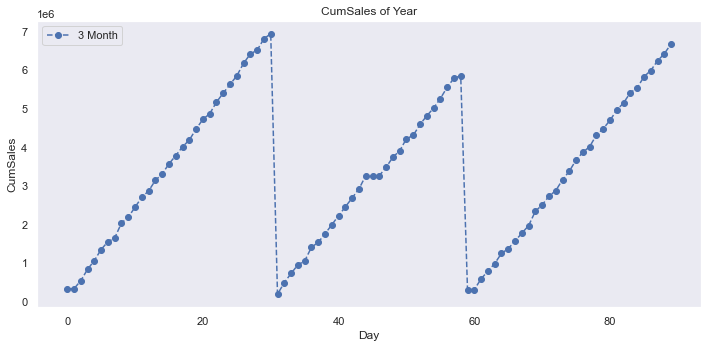

In [37]:
# transform_now(info)
sn.set_theme(style='dark')
plt.figure(figsize=[10,5])
plt.plot(info[:90,0],info[:90,1],marker='o',label='3 Month',linestyle='--',color='b')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of Year')
plt.tight_layout()
plt.show()


In [38]:
##### month 1-3 ##### DecisionTreeRegressor predict 1 Year
from sklearn.tree import DecisionTreeRegressor

x_train = info[:90,0]
y_train = info[:90,1]
dtree =  DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[363,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error = ",mean_absolute_error([info[363,1]],pred))
# info[363,0]



Predict_value =  [6672657.]
R2_core = 100.000
mean_absolute_error =  457097.0


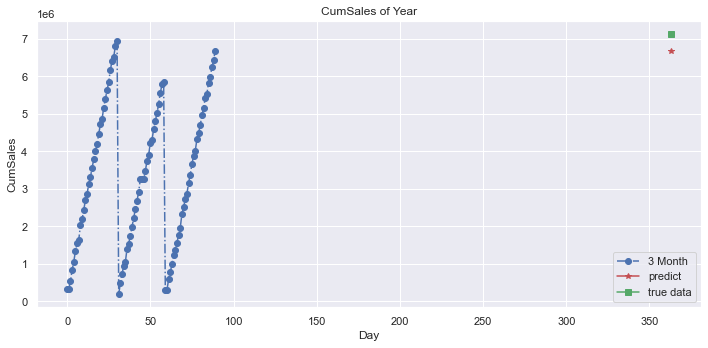

In [39]:

# inverse_d_new(info)
sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='o',label='3 Month',linestyle='-.',color='b')
plt.plot(info[x,0],pred,marker='*',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='g',label='true data')
# plt.plot([x_train[30],x_train[58],x_train[-1]],[y_train[30],y_train[58],y_train[-1]],marker='x',label='3 Month',linestyle='-.')
# plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
# plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of Year')
plt.tight_layout()
plt.show()





In [40]:
##### Year 1-3 ##### DecisionTreeRegressor predict 12 Year
from sklearn.tree import DecisionTreeRegressor

x_train = info[:1461,0]
y_train = info[:1461,1]
dtree =  DecisionTreeRegressor(max_depth=15)
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[4533,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error = ",mean_absolute_error([info[4533,1]],pred))
print("mean_squared_error = ",mean_squared_error([info[4533,1]],pred))
# info[4534,0]

Predict_value =  [9474554.]
R2_core = 70.502
mean_absolute_error =  969785.0
mean_squared_error =  940482946225.0


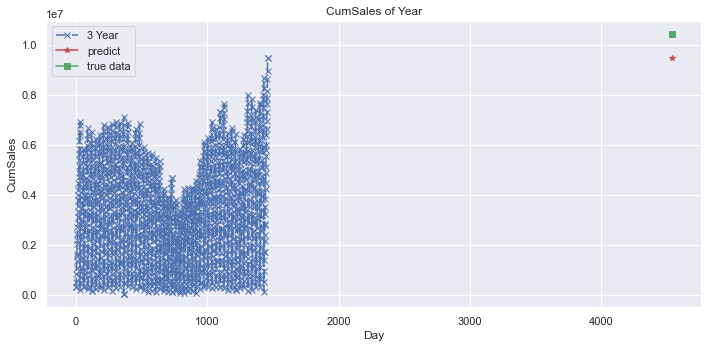

In [41]:
# transform_now(info)

sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Year',linestyle='-.',color='b')
plt.plot(info[x,0],pred,marker='*',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='g',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of Year')
plt.tight_layout()
plt.show()
# inverse_d_new(info)
# print(info[4533,0])
# print(dtree.get_depth())